### Exploratory Data Analysis (EDA) on COMPAS Dataset

In this Notebook we start exploring the version of the COMPAS dataset modified for the AEquitas tutorial

In this version have been computed label_value and score (field reqired by AEquitas)

After some plot and explorations, we start analyzing (without AEquitas) the diffrents subgroups and we discover some first signs of BIAS.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

sns.set()

In [2]:
COMPAS_FILE = 'compas_for_aequitas.csv'

compas_data = pd.read_csv(COMPAS_FILE)

In [3]:
# helper functions
def plot_histo_gender(df):
    count_sex = df.groupby(['sex']).size()
    
    # plot
    plt.title('Gender distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    sns.barplot(y = count_sex.values, x  = ['Female','Male']);

def plot_histo_race(df):
    race_x = sorted(compas_data['race'].unique())
    
    # shorten label
    N_CHARS = 8
    race_x = [x[0:N_CHARS] for x in race_x]
              
    count_race = df.groupby(['race']).size()
    
    # plot
    plt.title('Race distribution')
    plt.xlabel('Race')
    plt.ylabel('Count')
    sns.barplot(y = count_race.values, x = race_x);
    
def plot_histo_ages(df):
    # labels
    age_x = ['25-45', '> 45', '< 25']
              
    count_age = df.groupby(['age_cat']).size()
    
    # plot
    plt.title('Ages distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    sns.barplot(y = count_age.values, x = age_x);

# now, lets compute FP and FN on subgroups

def evaluate_on_race(df, race_group):
    condition = (df['race'] == race_group)
    
    reduced_df = df[condition]
    
    conf_matrix = confusion_matrix(reduced_df['label_value'].values, reduced_df['score'].values)
    
    tn, fp, fn, tp = conf_matrix.ravel()
    
    return tn, fp, fn, tp

def show_values(tn, fp, fn, tp):
    total = tn + fp + fn + tp
    print('Total population of the subgroup:', total)
    print('')
    print('TN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)
    print('')
    # rates
    print('Total False positive rate is:', round(fp/float(total), 2))
    print('Total False negative rate is:', round(fn/float(total), 2))

In [4]:
print('Total numer of samples in the dataset is:', compas_data.shape[0])

Total numer of samples in the dataset is: 7214


In [5]:
compas_data.head()

,entity_id,score,label_value,race,sex,age_cat
0,1,0.0,0,Other,Male,Greater than 45
1,3,0.0,1,African-American,Male,25 - 45
2,4,0.0,1,African-American,Male,Less than 25
3,5,1.0,0,African-American,Male,Less than 25
4,6,0.0,0,Other,Male,25 - 45


In [6]:
# data have been already pre-preprocessed to be used with AEquitas. Original COMPAS score has been changed in a binary label
# where 0 mean low risk of recidive in two years, 1 mean medium or high risk
# label_value is what has actually happened in the next two years: 0 no crime, 1, yes another crime committed.

In [7]:
# In our anlysis we can divide the population in groups, based on three category: race, sex and age (divied in bins)
# lets see how many different values:
print('The set of different categories for race is:', sorted(compas_data['race'].unique()))

print('The set of different categories for gender is:', sorted(compas_data['sex'].unique()))

print('The set of different categories for age is:', sorted(compas_data['age_cat'].unique()))

The set of different categories for race is: ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']
The set of different categories for gender is: ['Female', 'Male']
The set of different categories for age is: ['25 - 45', 'Greater than 45', 'Less than 25']


In [8]:
# caucasian is in someway and old classification category, used in the past. BUt actually it means: white, of European, Middle Eastern, or North African ancestry. (see, wikipedia)

In [9]:
# distribution of gender:

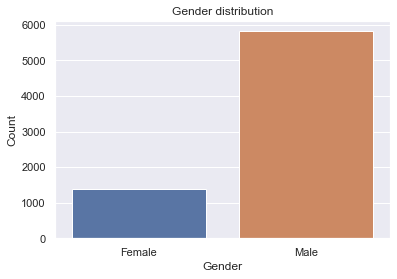

In [10]:
plot_histo_gender(compas_data)

### the majority of people in the dataset is Male

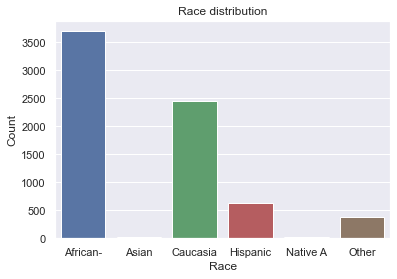

In [11]:
plot_histo_race(compas_data)

### The majority is Afro-american. Very few Asian and Native american

In [12]:
# Asian and Native anerican are fery few (32, 18)

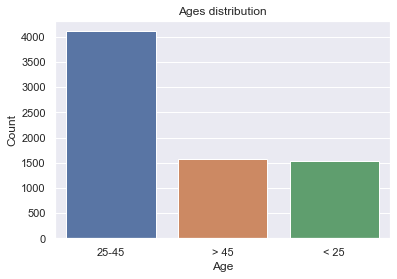

In [13]:
 plot_histo_ages(compas_data)

### The majority is in range: 25-45. Almost equal numbers for greater than 45 and less than 25. The last category is important because contains young people

In [14]:
# compute global accuracy of the model

condition = compas_data['score'] == compas_data['label_value']

# contains only samples for which prediction == label
df_ok = compas_data[condition]

accuracy = round(df_ok.shape[0]/float(compas_data.shape[0]), 2)

print('Overall accuracy is:', accuracy)

Overall accuracy is: 0.65


In [15]:
### a first remark: on the entire dataset the accuracy is not high: 62%

In [16]:
conf_matrix = confusion_matrix(compas_data['label_value'].values, compas_data['score'].values)
    
tn, fp, fn, tp = conf_matrix.ravel()

total = tn + fp + fn + tp
print('Total population is:', total)
print('')
print('TN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)
print('')
# rates
print('Total False positive rate is:', round(fp/float(total), 2))
print('Total False negative rate is:', round(fn/float(total), 2))

Total population is: 7214

TN: 2681 FP: 1282 FN: 1216 TP: 2035

Total False positive rate is: 0.18
Total False negative rate is: 0.17


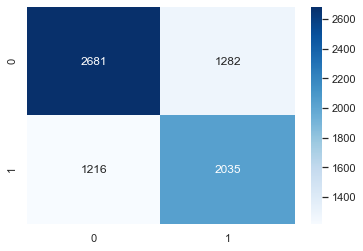

In [17]:
# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='4');

## Let's start our BIAS analysis

### Analyze different subgroups based on race

In [18]:
# Afro-american
race = 'African-American'

tn, fp, fn, tp = evaluate_on_race(compas_data, race)

print(race)
print('')

show_values(tn, fp, fn, tp)

African-American

Total population of the subgroup: 3696

TN: 990 FP: 805 FN: 532 TP: 1369

Total False positive rate is: 0.22
Total False negative rate is: 0.14


In [19]:
# Caucasian

race = 'Caucasian'

tn, fp, fn, tp = evaluate_on_race(compas_data, race)

print(race)
print('')

show_values(tn, fp, fn, tp)

Caucasian

Total population of the subgroup: 2454

TN: 1139 FP: 349 FN: 461 TP: 505

Total False positive rate is: 0.14
Total False negative rate is: 0.19


In [20]:
# Hispanic

race = 'Hispanic'

tn, fp, fn, tp = evaluate_on_race(compas_data, race)

print(race)
print('')

show_values(tn, fp, fn, tp)

Hispanic

Total population of the subgroup: 637

TN: 318 FP: 87 FN: 129 TP: 103

Total False positive rate is: 0.14
Total False negative rate is: 0.2


### We have a first interesting result here:

The **False Positive** rate is

* 0.14 for Caucasian
* 0.14 for Hispanic
* **0.22** for Afro-american

The **False Positive rate** is 1.6 **higher** in Afro-american than Caucasian.

False Positive means that an individual has been evaluated with COMPAS, the software has predicted that he was medium-high risk of repeating a crime but, actually, in the next two years he has NOT committed any crime. 

This is a sign of BIAS in the predictive model.